<a href="https://colab.research.google.com/github/Luly7/CS-6480/blob/main/Phantoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
0.620914096821446


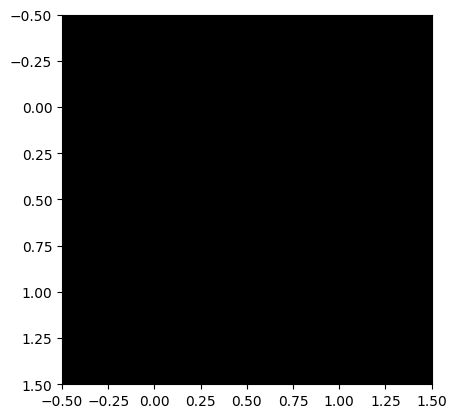

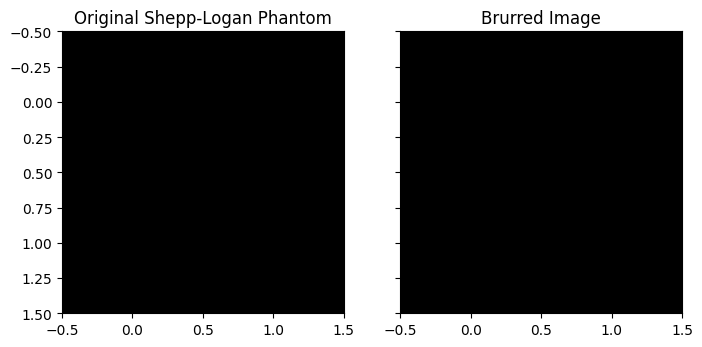

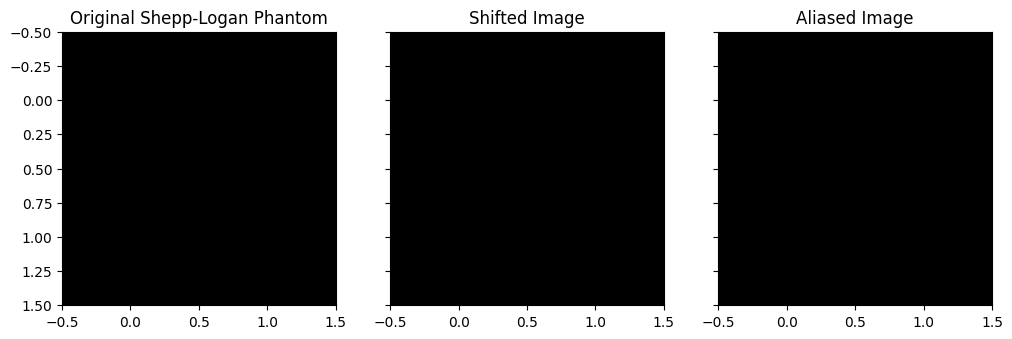

1.0


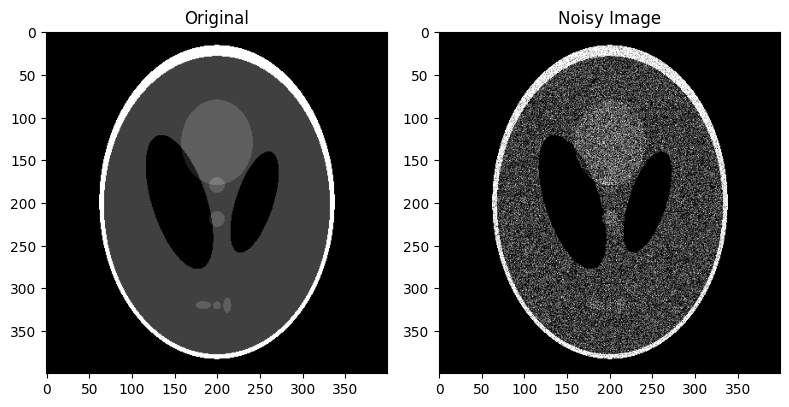

(900, 64, 64, 1)
1.0
0.5


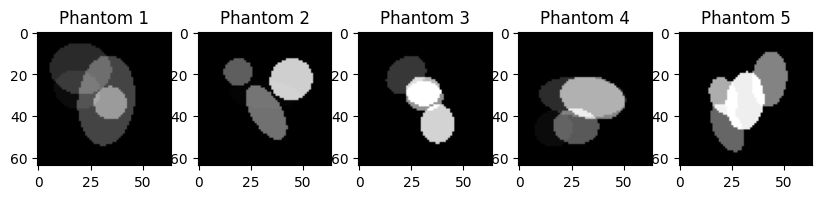

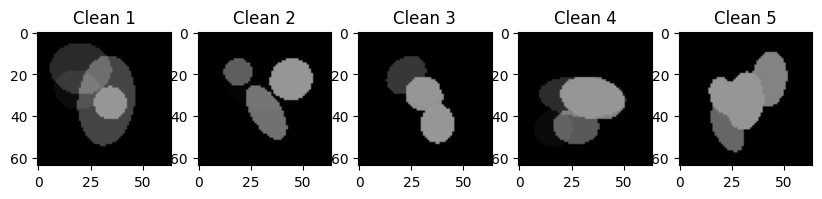

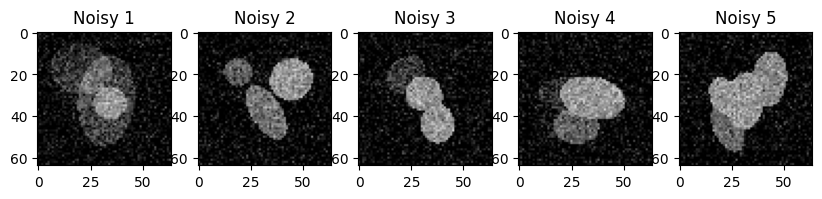

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - loss: 0.0421 - val_loss: 0.0114
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - val_loss: 0.0063
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0041
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 

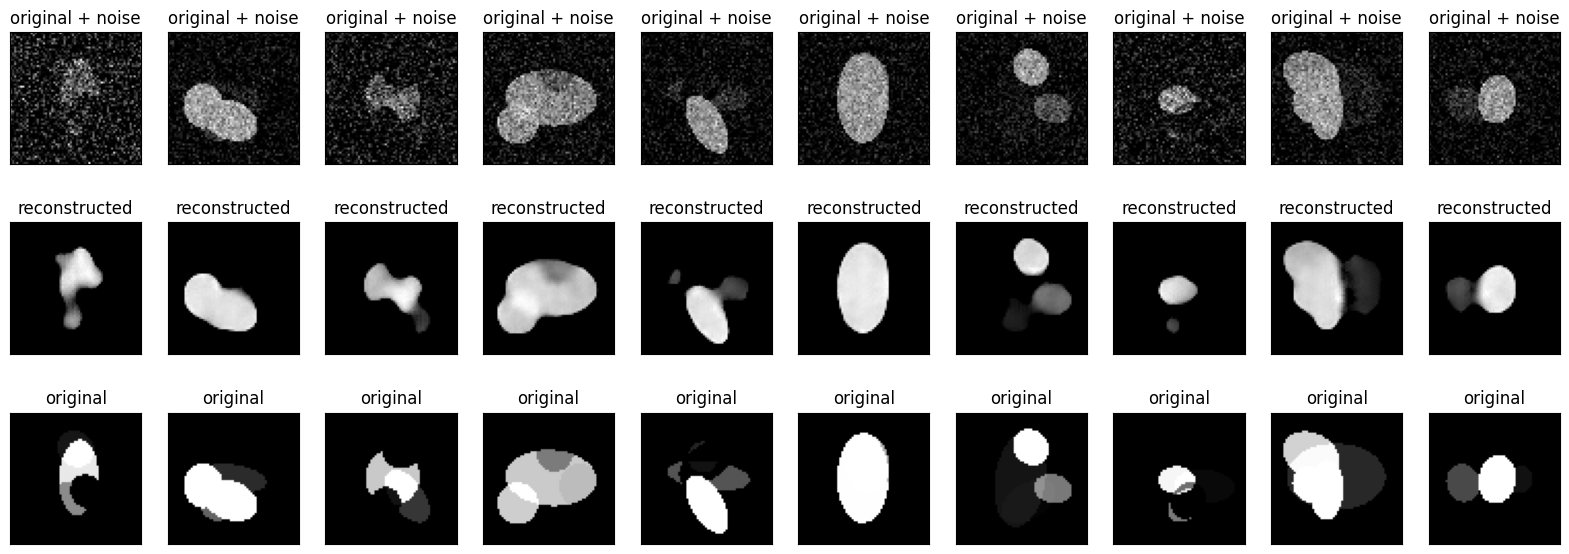

In [1]:
# -*- coding: utf-8 -*-
"""CS6480Lect05.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1NRTv7CN_p33BeecCmUGU-pO0Y8xYNRWb

Larry Zeng, January 18, 2025
Phantom Generation

# CS 6480 LarryPhantomGeneration.ipynb

## Phantom generator
https://jenda.hrach.eu/f2/cat-py/phantom.py
"""

## Copyright (C) 2010  Alex Opie  <lx_op@orcon.net.nz>
##
## This program is free software; you can redistribute it and/or modify it
## under the terms of the GNU General Public License as published by
## the Free Software Foundation; either version 3 of the License, or (at
## your option) any later version.
##
## This program is distributed in the hope that it will be useful, but
## WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.	See the GNU
## General Public License for more details.
##
## You should have received a copy of the GNU General Public License
## along with this program; see the file COPYING.  If not, see
## <http://www.gnu.org/licenses/>.

import numpy as np

def phantom (n = 2, p_type = 'Modified Shepp-Logan', ellipses = None):
	"""
	 phantom (n = 256, p_type = 'Modified Shepp-Logan', ellipses = None)

	Create a Shepp-Logan or modified Shepp-Logan phantom.

	A phantom is a known object (either real or purely mathematical)
	that is used for testing image reconstruction algorithms.  The
	Shepp-Logan phantom is a popular mathematical model of a cranial
	slice, made up of a set of ellipses.  This allows rigorous
	testing of computed tomography (CT) algorithms as it can be
	analytically transformed with the radon transform (see the
	function `radon').

	Inputs
	------
	n : The edge length of the square image to be produced.

	p_type : The type of phantom to produce. Either
	  "Modified Shepp-Logan" or "Shepp-Logan".  This is overridden
	  if `ellipses' is also specified.

	ellipses : Custom set of ellipses to use.  These should be in
	  the form
	  	[[I, a, b, x0, y0, phi],
	  	 [I, a, b, x0, y0, phi],
	  	 ...]
	  where each row defines an ellipse.
	  I : Additive intensity of the ellipse.
	  a : Length of the major axis.
	  b : Length of the minor axis.
	  x0 : Horizontal offset of the centre of the ellipse.
	  y0 : Vertical offset of the centre of the ellipse.
	  phi : Counterclockwise rotation of the ellipse in degrees,
	        measured as the angle between the horizontal axis and
	        the ellipse major axis.
	  The image bounding box in the algorithm is [-1, -1], [1, 1],
	  so the values of a, b, x0, y0 should all be specified with
	  respect to this box.

	Output
	------
	P : A phantom image.

	Usage example
	-------------
	  import matplotlib.pyplot as pl
	  P = phantom ()
	  pl.imshow (P)

	References
	----------
	Shepp, L. A.; Logan, B. F.; Reconstructing Interior Head Tissue
	from X-Ray Transmissions, IEEE Transactions on Nuclear Science,
	Feb. 1974, p. 232.

	Toft, P.; "The Radon Transform - Theory and Implementation",
	Ph.D. thesis, Department of Mathematical Modelling, Technical
	University of Denmark, June 1996.

	"""

	if (ellipses is None):
		ellipses = _select_phantom (p_type)
	elif (np.size (ellipses, 1) != 6):
		raise AssertionError ("Wrong number of columns in user phantom")

	# Blank image
	p = np.zeros ((n, n))

	# Create the pixel grid
	ygrid, xgrid = np.mgrid[-1:1:(1j*n), -1:1:(1j*n)]

	for ellip in ellipses:
		I   = ellip [0]
		a2  = ellip [1]**2
		b2  = ellip [2]**2
		x0  = ellip [3]
		y0  = ellip [4]
		phi = ellip [5] * np.pi / 180  # Rotation angle in radians

		# Create the offset x and y values for the grid
		x = xgrid - x0
		y = ygrid - y0

		cos_p = np.cos (phi)
		sin_p = np.sin (phi)

		# Find the pixels within the ellipse
		locs = (((x * cos_p + y * sin_p)**2) / a2
              + ((y * cos_p - x * sin_p)**2) / b2) <= 1

		# Add the ellipse intensity to those pixels
		p [locs] += I

	return p


def _select_phantom (name):
	if (name.lower () == 'shepp-logan'):
		e = _shepp_logan ()
	elif (name.lower () == 'modified shepp-logan'):
		e = _mod_shepp_logan ()
	else:
		raise ValueError ("Unknown phantom type: %s" % name)

	return e


def _shepp_logan ():
	#  Standard head phantom, taken from Shepp & Logan
	return [[   2,   .69,   .92,    0,      0,   0],
	        [-.98, .6624, .8740,    0, -.0184,   0],
	        [-.02, .1100, .3100,  .22,      0, -18],
	        [-.02, .1600, .4100, -.22,      0,  18],
	        [ .01, .2100, .2500,    0,    .35,   0],
	        [ .01, .0460, .0460,    0,     .1,   0],
	        [ .02, .0460, .0460,    0,    -.1,   0],
	        [ .01, .0460, .0230, -.08,  -.605,   0],
	        [ .01, .0230, .0230,    0,  -.606,   0],
	        [ .01, .0230, .0460,  .06,  -.605,   0]]

def _mod_shepp_logan ():
	#  Modified version of Shepp & Logan's head phantom,
	#  adjusted to improve contrast.  Taken from Toft.
	return [[   1,   .69,   .92,    0,      0,   0],
	        [-.80, .6624, .8740,    0, -.0184,   0],
	        [-.20, .1100, .3100,  .22,      0, -18],
	        [-.20, .1600, .4100, -.22,      0,  18],
	        [ .10, .2100, .2500,    0,    .35,   0],
	        [ .10, .0460, .0460,    0,     .1,   0],
	        [ .10, .0460, .0460,    0,    -.1,   0],
	        [ .10, .0460, .0230, -.08,  -.605,   0],
	        [ .10, .0230, .0230,    0,  -.606,   0],
	        [ .10, .0230, .0460,  .06,  -.605,   0]]

#def ?? ():
#	# Add any further phantoms of interest here
#	return np.array (
#	 [[ 0, 0, 0, 0, 0, 0],
#	  [ 0, 0, 0, 0, 0, 0]])

"""## Make your own phantom"""

import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale
import matplotlib.pyplot as pl
# P = phantom ()
# pl.imshow (P)

E = [[   0.3,   .6,   .8,    0,      0,   0],
     [   0.2,   .3,   .4, -0.1,   -.2,   0],
     [   -.2,   .4,   .2,   .2,     .2, -18],
     [   .10,   .2,   .1,   .1,    -.6,   0]]
P = phantom (n = 2, p_type = 'ellipses', ellipses = E)
pl.imshow (P, cmap=plt.cm.Greys_r)

from google.colab import drive
drive.mount('/content/drive')

"""## Random phantom"""

import numpy as np

x=np.random.random(24)
print(x[5])

x=np.random.random(24)
E = [[   x[ 0]-0.0,   0.5*x[ 1]+0.2,   0.5*x[ 2]+0.2,    x[ 3]-0.5,      x[ 4]-0.5,   100*x[ 5]   ],
     [   x[ 6]-0.1,   0.4*x[ 7]+0.2,   0.4*x[ 8]+0.2,    x[ 9]-0.5,      x[10]-0.5,   100*x[11]   ],
     [   x[12]-0.2,   0.3*x[13]+0.2,   0.3*x[14]+0.2,    x[15]-0.5,      x[16]-0.5,   100*x[17]   ],
     [   x[18]-0.3,   0.2*x[19]+0.2,   0.2*x[20]+0.2,    x[21]-0.5,      x[22]-0.5,   100*x[23]  ]]
P = phantom (n = 2, p_type = 'ellipses', ellipses = E)
P = np.maximum(0,P)
pl.imshow (P, cmap=plt.cm.Greys_r)

"""## Images with different resolutions"""

import matplotlib.pyplot as pl
import skimage.io
import skimage.filters
import sys



P = phantom ()
# pl.imshow (P, cmap=plt.cm.Greys_r)

sigma = 4
blurred = skimage.filters.gaussian(
    P, sigma=(sigma, sigma), truncate=3.5)
# skimage.io.imshow(blurred, cmap=plt.cm.Greys_r)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Original Shepp-Logan Phantom")
ax1.imshow(P, cmap=plt.cm.Greys_r)
ax2.set_title("Brurred Image")
ax2.imshow(blurred, cmap=plt.cm.Greys_r)
plt.show()

"""## Generating Shiftted Images"""

P = phantom ()

P_shifted = np.roll(P, shift=75, axis=0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Original Shepp-Logan Phantom")
ax1.imshow(P, cmap=plt.cm.Greys_r)
ax2.set_title("Shifted Image")
ax2.imshow(P_shifted, cmap=plt.cm.Greys_r)
ax3.set_title("Aliased Image")
ax3.imshow(P_shifted + P, cmap=plt.cm.Greys_r)
plt.show()

"""## Add Noise"""

import matplotlib.pyplot as plt
from skimage.transform import iradon
from skimage.util import random_noise

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

image = shepp_logan_phantom()
# image = rescale(image, scale=1, mode='reflect')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

pmax = np.max(image)*1
print(pmax)
noisyImage = pmax*random_noise(image/pmax, mode='poisson', clip=True)

ax2.set_title("Noisy Image")
ax2.imshow(noisyImage, cmap=plt.cm.Greys_r)


fig.tight_layout()
plt.show()

"""## Denoising using simuated data"""

!pip install tensorflow

import numpy as np
import random
import matplotlib.pyplot as plt
from skimage.transform import iradon
from skimage.util import random_noise
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale

# generate data
image_size = 64
num_phantoms = 1000

noise_factor = 0.1     #0.05
noisy_img = []
clean_img = []
noisy_imgV = []
clean_imgV = []
clean_phan = []

img_size1 = 64
img_size2 = 64

for i in range(num_phantoms):

    a = np.random.randint(20,30,2)
    #print(a)


    x=np.random.random(24)

    E = [[   x[ 0]-0.0,   0.6*x[ 1]+0.2,   0.8*x[ 2]+0.2,    0.1*(x[ 3]-0.5),      0.1*(x[ 4]-0.5),   10*x[ 5]   ],
         [   x[ 6]-0.1,   0.3*x[ 7]+0.2,   0.2*x[ 8]+0.2,    x[ 9]-0.5,      x[10]-0.5,   100*x[11]   ],
         [   x[12]-0.2,   0.2*x[13]+0.2,   0.3*x[14]+0.2,    x[15]-0.5,      x[16]-0.5,   100*x[17]   ],
         [   x[18]-0.3,   0.1*x[19]+0.2,   0.1*x[20]+0.2,    x[21]-0.5,      x[22]-0.5,   100*x[23]  ]]
    P = phantom (n = image_size, p_type = 'ellipses', ellipses = E)

    Pmax = np.max(P )
    P0 = P/(2*Pmax)
    P0 = np.maximum(0, P)
    P0 = np.minimum(0.5, P0)

    P1  = P0 + noise_factor * tf.random.normal(shape=P0.shape)


    # P1 = random_noise(P/1000, mode='poisson', seed=None, clip=True)
    P1 = np.maximum(0, P1)
    P1 = np.minimum(1, P1)

    clean_phan.append(P)    # Phantomss

    if i < 0.9*num_phantoms:
        noisy_img.append(P1)    # Data
        clean_img.append(P0)    # Targets
    else:
        noisy_imgV.append(P1)    # Data
        clean_imgV.append(P0)    # Targets

np_noisy_img = np.asarray(noisy_img)
np_clean_img = np.asarray(clean_img)
np_noisy_imgV = np.asarray(noisy_imgV)
np_clean_imgV = np.asarray(clean_imgV)
np_clean_phan = np.asarray(clean_phan)

# prepare data axes as expected by models
np_noisy = np.expand_dims(np_noisy_img, axis=-1)
np_clean = np.expand_dims(np_clean_img, axis=-1)
np_noisyV = np.expand_dims(np_noisy_imgV, axis=-1)
np_cleanV = np.expand_dims(np_clean_imgV, axis=-1)
np_phan = np.expand_dims(np_clean_phan, axis=-1)
print(np.shape(np_noisy))

#np_noisy = np_noisy/np.max(np_noisy)
print(np.max(np_noisy))
print(np.max(np_clean))

# Display some phantoms

fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(np_phan[idx], cmap=plt.cm.Greys_r, vmin=0, vmax=1)
    ax.set_title(f"Phantom {idx+1}")
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(np_clean[idx], cmap=plt.cm.Greys_r, vmin=0, vmax=1)
    ax.set_title(f"Clean {idx+1}")
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for idx, ax in enumerate(axs):
    ax.imshow(np_noisy[idx], cmap=plt.cm.Greys_r, vmin=0, vmax=1)
    ax.set_title(f"Noisy {idx+1}")
plt.show()

"""## Model 1: CNN"""

from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input, InputLayer
model = keras.Sequential([
    Conv2D(2, (3,3), activation='relu', padding='same', strides=1, use_bias=False),
    Conv2D(2, (3,3), activation='relu', padding='same', strides=1, use_bias=False),
    Conv2D(2, (3,3), activation='relu', padding='same', strides=1, use_bias=False),
    Conv2D(1, (3,3), activation='relu', padding='same', use_bias=False)
])

"""## Model 2 : U-Net"""

from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input, InputLayer
model = keras.Sequential([
 layers.Conv2D(15, 3, strides=2, activation="relu", padding="same"),
 layers.Conv2D(15, 3, activation="relu", padding="same"),
 layers.Conv2D(20, 3, strides=2, activation="relu", padding="same"),
 layers.Conv2D(20, 3, activation="relu", padding="same"),
 layers.Conv2D(25, 3, strides=2, padding="same", activation="relu"),
 layers.Conv2D(25, 3, activation="relu", padding="same"),
 layers.Conv2DTranspose(25, 3, activation="relu", padding="same"),
 layers.Conv2DTranspose(25, 3, activation="relu", padding="same", strides=2),
 layers.Conv2DTranspose(20, 3, activation="relu", padding="same"),
 layers.Conv2DTranspose(20, 3, activation="relu", padding="same", strides=2),
 layers.Conv2DTranspose(15, 3, activation="relu", padding="same"),
 layers.Conv2DTranspose(15, 3, activation="relu", padding="same", strides=2),
 layers.Conv2D(1, 3, activation="relu", padding="same")
])

model.compile(optimizer='adam', loss='mse')


#optimizer = keras.optimizers.Adam(lr=0.01)
#model.compile(loss='mse', optimizer=optimizer)

model.fit(np_noisy,
          np_clean,
          epochs=100,
          shuffle=True,
          validation_data=(np_noisyV, np_cleanV))

decoded_imgs=model(np_noisyV).numpy()

n = 10
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n):
  # display original + noise
  bx = plt.subplot(3, n, i + 1)
  plt.title("original + noise")
  plt.imshow(tf.squeeze(np_noisyV[i]))
  bx.get_xaxis().set_visible(False)
  bx.get_yaxis().set_visible(False)

  # display reconstruction
  cx = plt.subplot(3, n, i + n + 1)
  plt.title("reconstructed")
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  cx.get_xaxis().set_visible(False)
  cx.get_yaxis().set_visible(False)

  # display original
  ax = plt.subplot(3, n, i + 2*n + 1)
  plt.title("original")
  plt.imshow(tf.squeeze(np_cleanV[i]))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()





